In [1]:
import pandas as pd

df= pd.read_csv('Data/stock_prices.csv')
df

,Date,Closing Price
0,2010-01-04,30.950001
1,2010-01-05,30.959999
2,2010-01-06,30.770000
3,2010-01-07,30.450001
4,2010-01-08,30.660000
...,...,...
1253,2014-12-24,48.139999
1254,2014-12-26,47.880001
1255,2014-12-29,47.450001
1256,2014-12-30,47.020000


In [2]:
#0) Convert the date column to datetime

df['Date']= pd.to_datetime(df['Date'])

df.set_index('Date', inplace= True)
df

,Closing Price
Date,
2010-01-04,30.950001
2010-01-05,30.959999
2010-01-06,30.770000
2010-01-07,30.450001
2010-01-08,30.660000
...,...
2014-12-24,48.139999
2014-12-26,47.880001
2014-12-29,47.450001


In [3]:
#1) Resample the data as business days "B".

resampled= df.resample('B').mean()
resampled

,Closing Price
Date,
2010-01-04,30.950001
2010-01-05,30.959999
2010-01-06,30.770000
2010-01-07,30.450001
2010-01-08,30.660000
...,...
2014-12-25,NaN
2014-12-26,47.880001
2014-12-29,47.450001


In [4]:
#2) Check for missing values and impute if necessary. (for stock data, you should forward-fill the missing values).

df.isna().sum()

Closing Price    0
dtype: int64

Text(0.5, 1.0, 'Stock Prices')

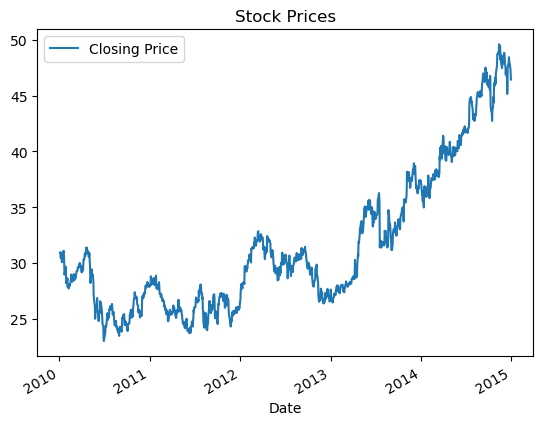

In [5]:
#3) Visualize the time series.

ax= df.plot()
ax.set_title('Stock Prices')

In [8]:
#5) Check for stationarity with the Ad Fuller Test.

import  statsmodels.tsa.api as tsa

# Custom function for Ad Fuller Test
def get_adfuller_results(ts, alpha=.05, label='adfuller', **kwargs): #kwargs for adfuller()
    # Saving each output
    (test_stat, pval, nlags, nobs, crit_vals_d, 
    icbest ) = tsa.adfuller(ts, **kwargs)
    # Converting output to a dictionary with the interpretation of p
    adfuller_results = {'Test Statistic': test_stat,
                        "# of Lags Used":nlags, 
                       '# of Observations':nobs,
                        'p-value': round(pval,6),
                        'alpha': alpha,
                       'sig/stationary?': pval < alpha}
    return pd.DataFrame(adfuller_results, index =[label])

In [11]:
adfuller_results = get_adfuller_results(df, label='Stock Prices')
adfuller_results

,Test Statistic,# of Lags Used,# of Observations,p-value,alpha,sig/stationary?
Stock Prices,-0.105346,0,1257,0.948903,0.05,False


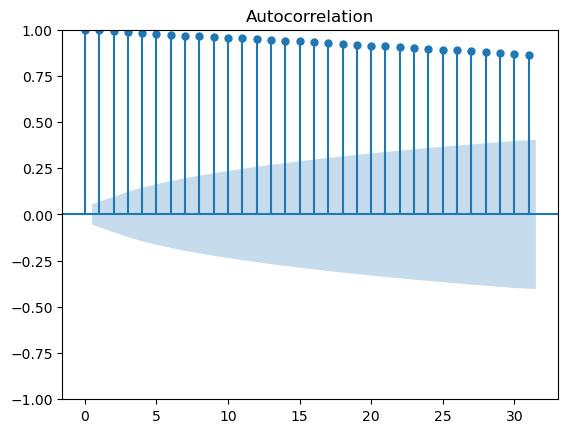

In [14]:
#6) Check for autocorrelation with an ACF plot.

fig = tsa.graphics.plot_acf(df)

In [ ]:
#7) Difference the data once.